In [1]:
import os
from pathlib import Path 

In [2]:
path = Path('data')
os.listdir(path)

['train_images',
 'test_images',
 'sample_submission.csv',
 'train.csv',
 'label_num_to_disease_map.json',
 'extra_data']

In [4]:
os.listdir(path/'extra')

['train', 'test', 'random.txt', 'sample_submission_file.csv', 'extraimages']

In [5]:
extra_labels = os.listdir(path/'extra'/'train')
extra_labels

['cgm', 'cbb', 'cmd', 'cbsd', 'healthy']

In [6]:
map2labs = {
    'cbb': 0,
    'cbsd': 1,
    'cgm': 2,
    'cmd': 3, 
    'healthy': 4
}

In [7]:
for lab in extra_labels:
    imgs = os.listdir(path/'extra'/'train'/lab)
    print(lab, map2labs[lab], len(imgs))

cgm 2 773
cbb 0 466
cmd 3 2658
cbsd 1 1443
healthy 4 316


In [8]:
train = pd.read_csv(path/'train.csv')
train

,image_id,label
0,1000015157.jpg,0
1,1000201771.jpg,3
2,100042118.jpg,1
3,1000723321.jpg,1
4,1000812911.jpg,3
...,...,...
21392,999068805.jpg,3
21393,999329392.jpg,3
21394,999474432.jpg,1
21395,999616605.jpg,4


In [9]:
old_imgs = [f'train_images/{img}' for img in train['image_id'].values]
old_labs = train['label'].tolist()

len(old_imgs), len(old_labs)

(21397, 21397)

In [10]:
new_imgs, new_labs = [] ,[]
for lab in extra_labels:
    imgs = os.listdir(path/'extra'/'train'/lab)
    new_imgs += [f'extra/train/{lab}/{img}' for img in imgs]
    new_labs += [map2labs[lab]]*len(imgs)
    
len(new_imgs), len(new_labs)

(5656, 5656)

In [11]:
train_extra = pd.DataFrame({
    'image_id': old_imgs + new_imgs,
    'label': old_labs + new_labs
})

train_extra

,image_id,label
0,train_images/1000015157.jpg,0
1,train_images/1000201771.jpg,3
2,train_images/100042118.jpg,1
3,train_images/1000723321.jpg,1
4,train_images/1000812911.jpg,3
...,...,...
27048,extra/train/healthy/train-healthy-22.jpg,4
27049,extra/train/healthy/train-healthy-228.jpg,4
27050,extra/train/healthy/train-healthy-205.jpg,4
27051,extra/train/healthy/train-healthy-94.jpg,4


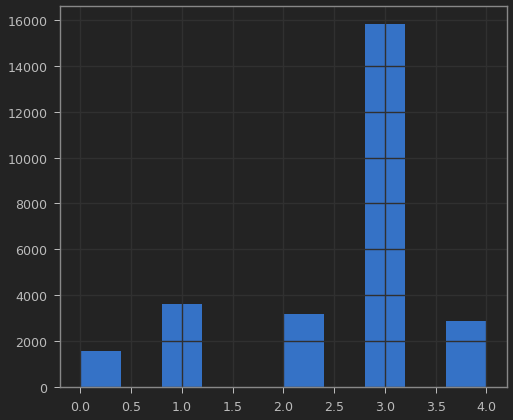

In [12]:
train_extra.label.hist()
plt.show()

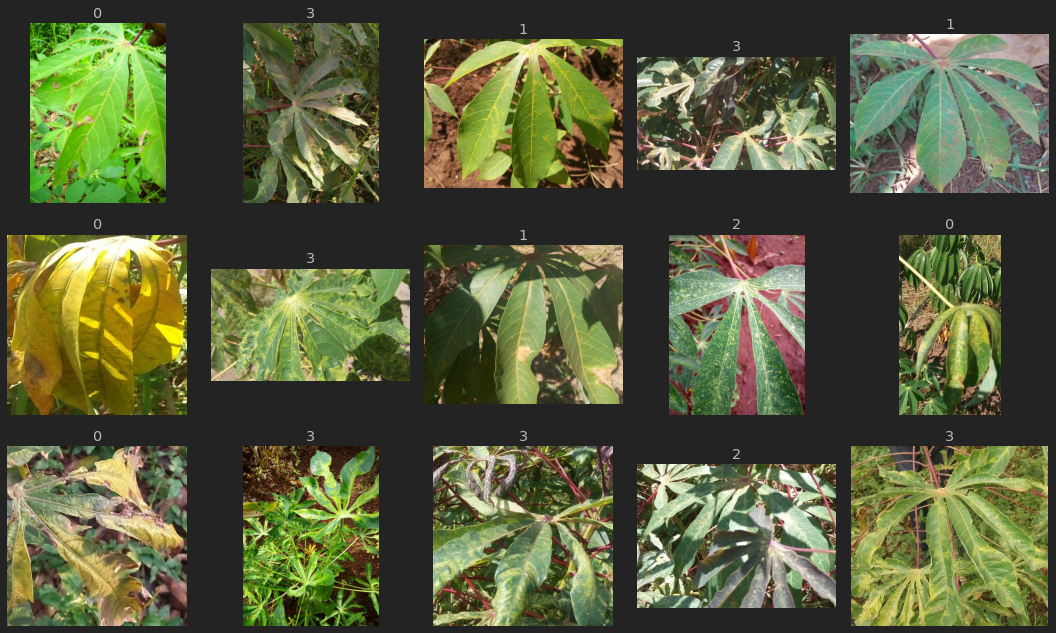

In [13]:
import random 
import torchvision

r, c = 3, 5
fig = plt.figure(figsize=(3*c, 3*r))
for _r in range(r):
    for _c in range(c):
        ax = plt.subplot(r, c, _r*c + _c + 1)
        ix = random.randint(0, len(new_imgs)-1)
        img = torchvision.io.read_image(str(path/new_imgs[ix]))
        label = new_labs[ix]
        plt.axis("off")
        plt.imshow(img.permute(1,2,0))
        plt.title(label)
plt.tight_layout()
plt.show()

In [28]:
from tqdm import tqdm
shapes = [] 
for img in tqdm(new_imgs):
    img = torchvision.io.read_image(str(path/img))
    if img.shape not in shapes: 
        shapes.append(img.shape)

100%|█████| 5656/5656 [00:30<00:00, 186.11it/s]


In [29]:
shapes

[torch.Size([3, 666, 500]),
 torch.Size([3, 500, 499]),
 torch.Size([3, 500, 500]),
 torch.Size([3, 500, 666]),
 torch.Size([3, 500, 625]),
 torch.Size([3, 500, 506]),
 torch.Size([3, 500, 888]),
 torch.Size([3, 500, 424]),
 torch.Size([3, 888, 500]),
 torch.Size([3, 500, 510]),
 torch.Size([3, 500, 505]),
 torch.Size([3, 500, 959]),
 torch.Size([3, 500, 526]),
 torch.Size([3, 500, 517]),
 torch.Size([3, 500, 545]),
 torch.Size([3, 500, 476]),
 torch.Size([3, 500, 613]),
 torch.Size([3, 500, 602]),
 torch.Size([3, 500, 512]),
 torch.Size([3, 500, 723]),
 torch.Size([3, 500, 596]),
 torch.Size([3, 575, 500]),
 torch.Size([3, 665, 500]),
 torch.Size([3, 500, 620]),
 torch.Size([3, 500, 509]),
 torch.Size([3, 533, 500]),
 torch.Size([3, 500, 574]),
 torch.Size([3, 500, 704]),
 torch.Size([3, 664, 500]),
 torch.Size([3, 500, 681]),
 torch.Size([3, 500, 624]),
 torch.Size([3, 610, 500]),
 torch.Size([3, 500, 680]),
 torch.Size([3, 1071, 500]),
 torch.Size([3, 521, 500]),
 torch.Size([3, 593

In [15]:
train_extra.to_csv(path/'train_extra.csv', index=False)

In [16]:
train_old = pd.DataFrame({
    'image_id': old_imgs,
    'label': old_labs
})

train_old 

,image_id,label
0,train_images/1000015157.jpg,0
1,train_images/1000201771.jpg,3
2,train_images/100042118.jpg,1
3,train_images/1000723321.jpg,1
4,train_images/1000812911.jpg,3
...,...,...
21392,train_images/999068805.jpg,3
21393,train_images/999329392.jpg,3
21394,train_images/999474432.jpg,1
21395,train_images/999616605.jpg,4


In [17]:
train_old.to_csv(path/'train_old.csv', index=False)